In [481]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

import os
import os.path as path
import wget

In [482]:
A = np.array([[1,0,0],[5,1,0],[-2,3,1]])
B = np.array([[4,-2,1],[0,3,7],[0,0,2]])


#3,4,7,9

#3
def GetMultiplication(A,B):
    matrix_column = []
    for i in range(len(B)):
        column = []
        for j in range(len(B)): 
            column.append(B[j][i])
        matrix_column.append(column)
    

    multiplication_matrix =[]
    for k in A:
        new_matrix = []
        for w in matrix_column:
            new_matrix.append(np.dot(k,w))
        multiplication_matrix.append(new_matrix)
        
    return np.array(multiplication_matrix)

print("El resultado de la multiplicación entre las matrices dadas es:\n {}".format(GetMultiplication(A,B)))

El resultado de la multiplicación entre las matrices dadas es:
 [[ 4 -2  1]
 [20 -7 12]
 [-8 13 21]]


**4)Teorico**

Este método de sustitución hacia delante se usa especialmente para solucionar sistemas de la forma $Lx = b$ donde es posible L es la matriz triangular inferior que sale al factorizar una matriz A. Así, sea el sistema de solución de matrices dado por,

$$ \begin{bmatrix}
l_{11} & 0 & 0  \\
l_{21} & l_{22} & 0  \\
l_{31} & l_{32} & l_{33}  \\

\end{bmatrix} 
\begin{bmatrix}
x_1  \\
x_2  \\
x_3 
\end{bmatrix} 
= 
\begin{bmatrix}
b_1  \\
b_2  \\
b_3 
\end{bmatrix} 
$$

La solución para la primera variable sería de la forma,

$$ L_{11} x_1 = b_1 \rightarrow x_1 = \frac{b_1}{L_{11}} $$

La solución para la segunda variable sería de la forma,

$$ L_{21} x_1 + L_{22} x_2 = b_2 $$

Sustituyendo $x_1$ y despejando la para $x_2$ obtenemos que,

$$ x_2 = \frac{b_2 - L_{21} (b_1/L_{11})}{L_{22}} $$

Para la solución de la tercera variable obtenemos que,
$$ L_{33}  x_3 + L_{31} x_1 + L_{32}  x_2 = b_3 $$

Como podemos observar la i-ésima solución dependerá de las soluciones anteriores, por lo que la sumatoria se puede escribir de la forma, 

$$ b_i =  \sum_{j=1}^{i} A_{ij}  x_j $$

Sin embargo, si queremos despejar la variable i-ésima, debemos de cambiar los índices de la sumatoria y extraer el término de que deseamos,

$$ b_i =  L_{ii} x_i + \sum_{j=0}^{i-1} A_{ij}  x_j \rightarrow L_{ii}x_i = b_i - \sum_{j=0}^{i-1} A_{ij}  x_j$$

En este caso, la matriz factorizada L tiene la particularidad que su diagonal está compuesta solo por números uno. Por lo que nuestra ecuacion queda reducida a,

$$ x_i = b_i -  \sum_{j=0}^{i-1} A_{ij}  x_j $$

Y así queda mostrada la ecuación del enunciado para el método de sustitución hacia atrás.

In [483]:
#7
def FactorizationLU(m):
    A = np.array(m)
    n = A.shape[0]
    L = np.zeros((n,n))
    U = np.zeros((n,n))
    
    for j in range(n):
        L[j][j] = 1.0
        
        for i in range(j+1,n):
            L[i][j] = A[i][j] / A[j][j]
            
            for k in range(j+1,n):
                A[i][k] = A[i][k] - L[i][j]*A[j][k]
                
        for k in range(j,n):
            U[j][k] = A[j][k]
    
    return L,U

M = np.array([[4,-2,1],[20,-7,12],[-8,13,17]])
L,U = FactorizationLU(M)

print("Dada la matriz  A su respectiva factorización es: \n L: \n {} \n U: \n {}".format(L,U))

Dada la matriz  A su respectiva factorización es: 
 L: 
 [[ 1.  0.  0.]
 [ 5.  1.  0.]
 [-2.  3.  1.]] 
 U: 
 [[ 4. -2.  1.]
 [ 0.  3.  7.]
 [ 0.  0. -2.]]


In [484]:
#9 usando funciones raras de numpy y arctan2

def GetJacobiEig(A, it=1000):
    #Definir dimension y matrices necesarias.
    n = A.shape[0]
    #Matriz para los valores propios.
    D = A.copy()
    #Matriz para los vectores propios.
    B = -np.eye(n)
     
    #Encontrar los índices del máximo elemento no diagonal. 
    for k in range(it):
        max_index = (0, 0)
        max_value = 0
        for i in range(n):
            for j in range(i+1, n):
                value = np.abs(D[i][j])
                if value > max_value:
                    max_value = value
                    max_index = (i,j)
        
        #Indice de la fila.          
        i = max_index[0]
        #Indice de la columna.
        j = max_index[1]

        #Se calcula el ángulo de rotación teniendo en cuenta los signos del cuadrante.
        if D[i][i] == D[j][j]:
            theta = np.pi / 4
        else:
            t = (2 * D[i][j]) / (D[j][j] - D[i][i]) 
            if t >= 0:
                theta = 0.5 * np.tan(t)
            else:
                theta = 0.5 * np.tan(t) + np.pi
        
        #Se asignan los valores para la matriz de rotación.
        R = np.eye(n)
        R[i][i] = np.cos(theta)
        R[j][j] = np.cos(theta)
        R[i][j] = np.sin(theta)
        R[j][i] = -np.sin(theta)

        #Se actualizan las matrices D y B
        #Para los valores propios será el producto punto entre la transpuesta de R, y el producto punto de D y R.
        D = np.dot(R.T, np.dot(D, R))
        #Para los vectores propios será el producto punto de la matriz B existente y R.
        B = np.dot(B, R)


    #Los valores propios serán la diagonal de la matriz D.
    eigen_values = np.diag(D)
    #Los vectores propios serán la matriz B.
    eigen_vectors = B

    return eigen_values, eigen_vectors

C = np.array([[4,1,1],[1,3,2],[1,2,5]])
values,vectors = GetJacobiEig(C)
print("Los valores propios de la matriz son {} \n y sus repectivos vectores propios:\n {}".format(values,vectors))

Los valores propios de la matriz son [6.89510652 3.39729507 1.70759841] 
 y sus repectivos vectores propios:
 [[ 0.43170413  0.88573564  0.17059871]
 [ 0.49725362 -0.07589338 -0.86427949]
 [ 0.75257583 -0.45794385  0.47319874]]


In [485]:

np.linalg.eig(C)

(array([6.89510652, 3.39729507, 1.70759841]),
 array([[ 0.43170413,  0.88573564,  0.17059871],
        [ 0.49725362, -0.07589338, -0.86427949],
        [ 0.75257583, -0.45794385,  0.47319874]]))

**15** Dadas las matrices de Dirac se puede comprobar la propiedad anticonmutación, dicha propiedad asegura que se genere una representación matricial en el álgebra de Clifford dada por la siguiente relación:

$$ \gamma^u \gamma^v + \gamma^v \gamma^u = 2\mu^{uv} I_{4x4} \rightarrow \mu^{uv} = diag(1,-1,-1,-1)$$

Para comprobar la anterior relación, tomaremos dos casos específicos, cuando $u\neq v$ y $u=v$ . Para el primer caso, podemos observar que sin importar el orden de los índices, el resultado obtenido es la matriz cero.

In [486]:
i = sym.Symbol('i')
gamma_zero = np.array([[1,0,0,0],[0,1,0,0],[0,0,-1,0],[0,0,0,-1]])
gamma_one = np.array([[0,0,0,1],[0,0,1,0],[0,-1,0,0],[-1,0,0,0]])
gamma_two = np.array([[0,0,0,-i],[0,0,i,0],[0,i,0,0],[-i,0,0,0]])
gamma_three = np.array([[0,0,1,0],[0,0,0,-1],[-1,0,0,0],[0,1,0,0]])

def GetRelation(a,b):
    z = GetMultiplication(a,b) + GetMultiplication(b,a)
    return sym.Matrix(z)

In [487]:
one = GetRelation(gamma_zero,gamma_one)
print("Para gamma^0 y gamma^1 obtenemos:")
one

Para gamma^0 y gamma^1 obtenemos:


Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

In [488]:
one = GetRelation(gamma_zero,gamma_two)
print("Para gamma^0 y gamma^2 obtenemos:")
one

Para gamma^0 y gamma^2 obtenemos:


Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

In [489]:
one = GetRelation(gamma_zero,gamma_three)
print("Para gamma^0 y gamma^3 obtenemos:")
one

Para gamma^0 y gamma^3 obtenemos:


Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

In [490]:
one = GetRelation(gamma_one,gamma_two)
print("Para gamma^1 y gamma^2 obtenemos:")
one

Para gamma^1 y gamma^2 obtenemos:


Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

In [491]:
one = GetRelation(gamma_one,gamma_three)
print("Para gamma^1 y gamma^3 obtenemos:")
one

Para gamma^1 y gamma^3 obtenemos:


Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

In [492]:
one = GetRelation(gamma_two,gamma_three)
print("Para gamma^2 y gamma^3 obtenemos:")
one

Para gamma^2 y gamma^3 obtenemos:


Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

Con respecto al segundo caso, se puede observar que para la matriz $\gamma^0$ la relación da como resultado $2\mathbb{I}_{4x4}$. En cambio, para el resto de índices el resultado es $-2\mathbb{I}_{4x4}$ donde $\mathbb{I}$ es la matriz identidad.

In [493]:
one = GetRelation(gamma_zero,gamma_zero)
print("Para gamma^0 obtenemos:")
one

Para gamma^0 obtenemos:


Matrix([
[2, 0, 0, 0],
[0, 2, 0, 0],
[0, 0, 2, 0],
[0, 0, 0, 2]])

In [494]:
one = GetRelation(gamma_one,gamma_one)
print("Para gamma^1 obtenemos:")
one

Para gamma^1 obtenemos:


Matrix([
[-2,  0,  0,  0],
[ 0, -2,  0,  0],
[ 0,  0, -2,  0],
[ 0,  0,  0, -2]])

In [495]:
one = GetRelation(gamma_two,gamma_two)
print("Para gamma^2 obtenemos:")
one

Para gamma^2 obtenemos:


Matrix([
[2*i**2,      0,      0,      0],
[     0, 2*i**2,      0,      0],
[     0,      0, 2*i**2,      0],
[     0,      0,      0, 2*i**2]])

In [496]:
one = GetRelation(gamma_three,gamma_three)
print("Para gamma^3 obtenemos:")
one

Para gamma^3 obtenemos:


Matrix([
[-2,  0,  0,  0],
[ 0, -2,  0,  0],
[ 0,  0, -2,  0],
[ 0,  0,  0, -2]])

Dados estos resultados, se puede representar dicha relación de anticonmutación en una matriz cuyas filas y columnas estarán determinados por los índices de las matrices $u$ y $v$ respectivamente como se muestra a continuación,

$$\begin{bmatrix}
(\gamma^0,\gamma^0) & (\gamma^0,\gamma^1) & (\gamma^0,\gamma^2) & (\gamma^0,\gamma^3) \\
(\gamma^1,\gamma^0) & (\gamma^1,\gamma^1) & (\gamma^1,\gamma^2) & (\gamma^1,\gamma^3) \\
(\gamma^2,\gamma^0) & (\gamma^2,\gamma^1) & (\gamma^2,\gamma^2) & (\gamma^2,\gamma^3) \\
(\gamma^3,\gamma^0) & (\gamma^3,\gamma^1) & (\gamma^3,\gamma^2) & (\gamma^3,\gamma^3) 
\end{bmatrix}
\rightarrow
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & -1 & 0 & 0 \\
0 & 0 & -1 & 0 \\
0 & 0 & 0 & -1 
\end{bmatrix}$$

Como podemos observar, la diagonal de dicha representación matricial corresponde a la métrica de Minkowsky, así podemos escribir la relación de anticonmutación como,

$$ \gamma^u \gamma^v + \gamma^v \gamma^u = 2\mu^{uv} I_{4x4} \rightarrow \mu^{uv} = diag(1,-1,-1,-1) $$

Por lo que queda verificada que la anterior relación cumple con el álgebra de Clifford.


In [598]:
#segunda parte 1,7
#1,a
A = np.array([[2.,-1.],[1.,2.],[1.,1.]])
b = np.array([2.,1.,4.])

M = np.dot(A.T,A)
n = np.dot(A.T,b)

#En esta parte del código se solucionará el sistema hallado Mx* = b.
x0 = np.array([0.,0.])

def Jacobi(A,b,x0, itmax=1000, tolerancia= 1e-9):
    x = x0.copy()
    for it in range(itmax):
        xn = np.zeros_like(x0)
        for i in range(A.shape[0]):
            sum_ = 0.
            for j in range(A.shape[1]):
                if j!=i:
                    sum_ += A[i,j]*x[j] 
            xn[i] = (b[i] - sum_)/A[i,i]
        residuo = np.linalg.norm( np.dot(A,xn) - b )
        x = xn.copy()
        if np.allclose(residuo,tolerancia,atol=tolerancia):
            break
    return x
  
solution = Jacobi(M,n,x0)
print("El punto solucón para el sistema de ecuaciones es: {}".format(solution))


El punto solucón para el sistema de ecuaciones es: [1.42857143 0.42857143]


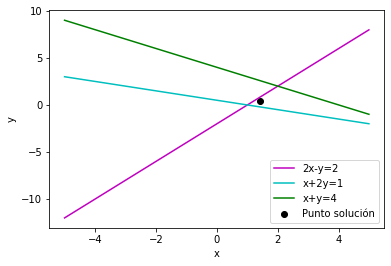

In [638]:
X = np.arange(-5., 5., 0.01)
Y = np.arange(-5., 5., 0.01)

y1 = (2*X) -2
y2 = (1 - X)/2
y3 = 4-X    

plt.plot(X, y1,color='m',label='2x-y=2')
plt.plot(X, y2,color='c',label='x+2y=1')
plt.plot(X, y3,color='g',label='x+y=4')
plt.scatter(solution[0],solution[1],color='k',label='Punto solución')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


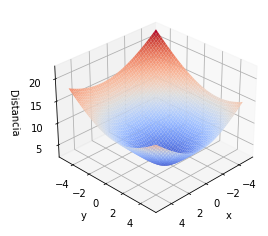

In [607]:
#En esta parte del código se hallarán las distancias mínimas.
Z = np.zeros((len(X), len(Y)))

for i in range(len(X)):
    for j in range(len(Y)):
        distance = np.linalg.norm(np.dot(A ,np.array([X[i],Y[j]]))-b)
        Z[i][j] = distance

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(X, Y)
ax.plot_surface(X, Y, Z, cmap='coolwarm')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Distancia')
ax.view_init(elev=30, azim=45)
plt.show()


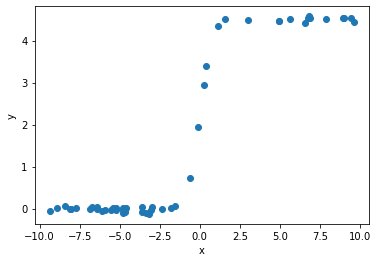

In [640]:
#Carga de datos.
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Sigmoid.csv'
data = pd.read_csv(url)

plt.scatter(data['x'], data['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [641]:
#Variables.
theta_0 = sym.symbols("theta_0", real=True)
theta_1 = sym.symbols("theta_1", real=True)
theta_2 = sym.symbols("theta_2", real=True)
x = sym.symbols("x", real=True)

#Datos.
X = np.array(data['x'])
Y = np.array(data['y'])

#Parámetros.
theta = np.array([1., 1., 1.])
r = 1e-3
e = 0.01
it = 10000

In [642]:
#a)
def M():
  return theta_0 / (theta_1 + sym.exp(-theta_2*x))

In [643]:
#b)
def X2(x, y,theta):
    return np.sum((y - M(x, theta))**2)

c) Sea la función de costo $X^2(\vec{\theta})$ y al ser la derivada un operador lineal, podemos ingresar dicho operador y derivar dentro de la sumatoria aplicando regla de la cadena.

$$
\frac{\partial X^2(\vec{\theta})}{\partial \theta_i} = \sum_{i=1}^N \frac{\partial}{\partial \theta_i} (y_i - M(x_i,\vec{\theta}))^2$$

$$ \frac{\partial X^2(\vec{\theta})}{\partial \theta_i} = \sum_{i=1}^N (2) (y_i - M(x_i,\vec{\theta})) \Big( -\frac{\partial M(x_i,\vec{\theta})}{\partial \theta_i}\Big) = -2\sum_{i=1}^N (y_i - M(x_i,\vec{\theta})) \frac{\partial M(x_i,\vec{\theta})}{\partial \theta_i}$$

Y así queda mostrado que las derivadas parciales están dadas por dicha expresión.

In [644]:
#Gradiente con respecto a theta.
def Gradient_M():
  M_d0_ = sym.lambdify([x,theta_0,theta_1,theta_2], sym.diff(M(), theta_0))
  M_d1_ = sym.lambdify([x,theta_0,theta_1,theta_2], sym.diff(M(), theta_1))
  M_d2_ = sym.lambdify([x,theta_0,theta_1,theta_2], sym.diff(M(), theta_2))

  return M_d0_, M_d1_, M_d2_

In [645]:
#Implementación del método.
def DescendentGradient(Mod,x,y,theta,e,it,r):
  error = e + 1
  iterations = 0
  d0, d1, d2 = Gradient_M()

  while error > e and iterations < it:
    sumatory = 0

    for i in range(len(y)):
      d_0 = d0(x[i],theta[0], theta[1], theta[2])
      d_1 = d1(x[i],theta[0], theta[1], theta[2])
      d_2 = d2(x[i],theta[0], theta[1], theta[2])

      #Sumatoria dada por la derivada en cada punto
      sumatory += (y[i]-Mod(x[i],theta[0],theta[1],theta[2]))*np.array([d_0,d_1,d_2])
    
    #Expresion del descenso gradiente demostrada vectorialmente.
    theta_j = theta - (r * (-2*sumatory))
    #Renovamos la variable theta.
    theta = theta_j

    #El error estará dado por norma del vector que sale de la expresión que minimizamos.
    error = np.linalg.norm(r * (-2*sumatory))
    iterations += 1

  return theta_j

Text(0, 0.5, 'y')

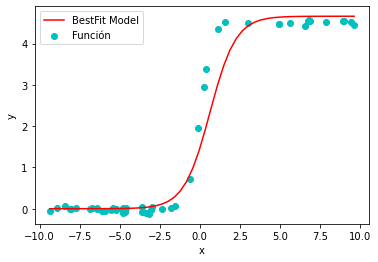

In [646]:
#Devolvemos las variables de sympy.
M_ = sym.lambdify([x,theta_0,theta_1,theta_2],M())
#Los theta_i serán los parámetros minimizados.
theta_i = DescendentGradient(M_,X,Y,theta,e,it,r)

#Definimos los x usados para el ploteo.
_x = np.linspace(np.min(X),np.max(X),50)
#Definimos los y dados el theta óptimo.
_y = []
for i in _x:
    _y.append(theta_i[0] / (theta_i[1] + sym.exp(-theta_i[2]*i)))

#Ploteo
plt.scatter(X,Y,color='c', label='Función')
plt.plot(_x,_y,color='r',label='BestFit Model')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

In [647]:

theta0 = sym.symbols("theta0", real=True)
theta1 = sym.symbols("theta1", real=True)
theta2 = sym.symbols("theta2", real=True)
x = sym.symbols("x", real=True)

def Model():
  return theta0 / (theta1 + sym.exp(-theta2*x))

def GetGradient():
  Model_x = sym.diff(Model(), theta0)
  Model_y = sym.diff(Model(), theta1)
  Model_z = sym.diff(Model(), theta2)

  Model_x_ = sym.lambdify([x,theta0,theta1,theta2], Model_x)
  Model_y_ = sym.lambdify([x,theta0,theta1,theta2], Model_y)
  Model_z_ = sym.lambdify([x,theta0,theta1,theta2], Model_z)

  return Model_x_, Model_y_, Model_z_

def GetSolution(Model,x,y,theta,tolerancia,itmax,gamma):
  error = tolerancia + 1
  iters = 0
  Model_x, Model_y, Model_z = GetGradient()

  while error > tolerancia and iters < itmax:
    sigma = 0

    for i in range(len(y)):
      Modelx = Model_x(x[i],theta[0], theta[1], theta[2])
      Modely = Model_y(x[i],theta[0], theta[1], theta[2])
      Modelz = Model_z(x[i],theta[0], theta[1], theta[2])

      sigma += (y[i]-Model(x[i],theta[0],theta[1],theta[2]))*np.array([Modelx,Modely,Modelz])
    
    criteria = gamma * (-2*sigma)
    theta_new = theta - criteria
    theta = theta_new

    error = np.linalg.norm(criteria)
    iters += 1

  return theta_new

Model_ = sym.lambdify([x,theta0,theta1,theta2],Model())
theta = np.array([1,1,1])
gamma = 1e-3
tolerancia = 0.01
itmax = 10000
X = np.array(data['x'])
Y = np.array(data['y'])
xi = GetSolution(Model_,X,Y,theta,tolerancia,itmax,gamma)

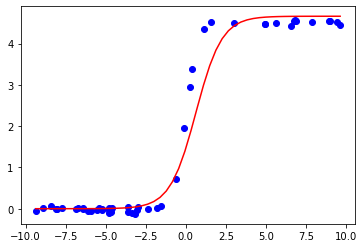

In [648]:
xi = GetSolution(Model_,X,Y,theta,tolerancia,itmax,gamma)
_x = np.linspace(np.min(X),np.max(X),50)
_y = []

for i in _x:
    _y.append(xi[0] / (xi[1] + sym.exp(-xi[2]*i)))

plt.scatter(X,Y,color='b')
plt.plot(_x,_y,color='r')